In [1]:
from sklearn.ensemble import GradientBoostingRegressor as GB
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
(X,y) = load_boston(return_X_y=True)

In [5]:
X.shape

(506, 13)

In [6]:
y.shape

(506,)

In [7]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.1)

In [17]:
ne = 100000
M = GB(n_estimators=ne)

In [18]:
M.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=100000)

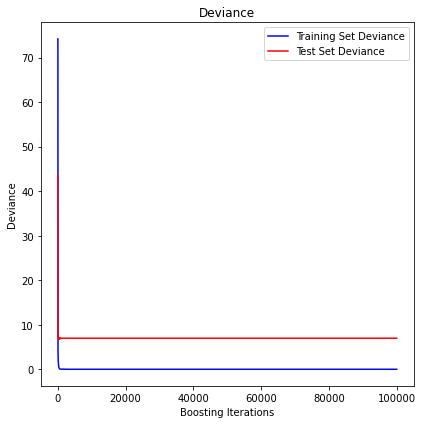

In [22]:
import numpy as np
import matplotlib.pyplot as plt
reg = M
test_score = np.zeros((ne,), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_val)):
    test_score[i] = reg.loss_(y_val, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(ne) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(ne) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()
